In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/arturcabral/Documents/Ironhack/Labs/Week_4/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [2]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [4]:
df["boughtInLastMonth"].nunique()

25

In [5]:
df3 = df.groupby("category").agg({"asin":"count"}).sort_values(by="asin", ascending=False)
df3.head(5)

,asin
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [6]:
df2 = pd.crosstab(index=df["category"], columns=["total"]).sort_values(by="total", ascending=False)
df2.head(5)

col_0,total
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [7]:
df_category = df2[0:5]


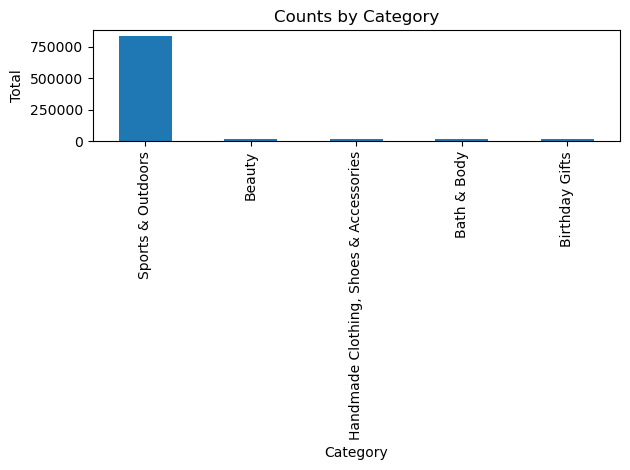

In [8]:
df_category.plot(kind="bar", legend=None)
plt.xlabel("Category")
plt.ylabel("Total")
plt.title("Counts by Category")
plt.tight_layout()  # ajustar o layout para as labels
plt.show()

In [9]:
df2_reset = df_category.reset_index()

/var/folders/nt/dslv10js033g889ybfhq1dmw0000gn/T/ipykernel_10430/3427740462.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df2_reset["category"], x=df2_reset["total"].values, palette="pastel", width=0.5)


<Axes: ylabel='category'>

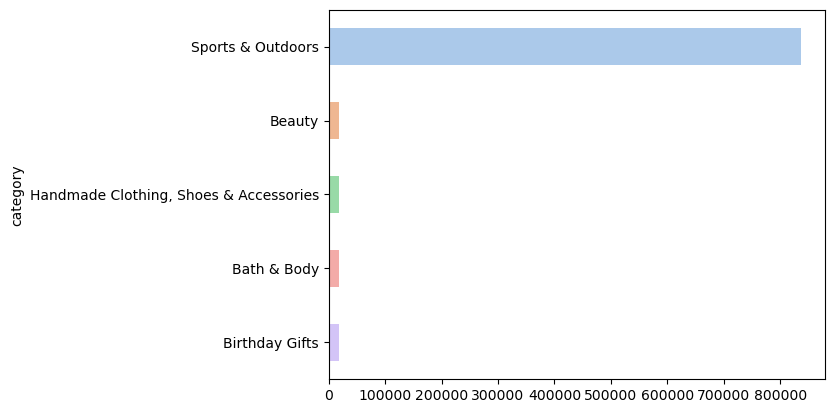

In [10]:
sns.barplot(y=df2_reset["category"], x=df2_reset["total"].values, palette="pastel", width=0.5) 

<Axes: ylabel='count'>

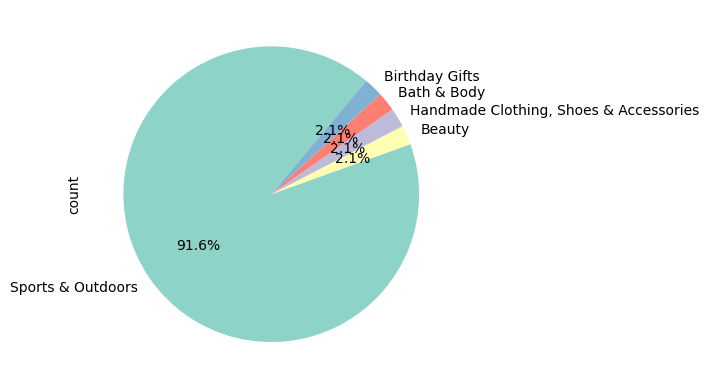

In [11]:
df["category"].value_counts().sort_values(ascending=False)[0:5].plot.pie(autopct='%1.1f%%', startangle=50, colors=sns.color_palette("Set3"))

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1 Measures of Centrality:

    Calculate the mean, median, and mode for the price of products.
    What's the average price point of products listed? How does this compare with the most common price point (mode)?

2 Measures of Dispersion:

    Determine the variance, standard deviation, range, and interquartile range for product price.
    How varied are the product prices? Are there any indicators of a significant spread in prices?

3 Visualizations:

    Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
    Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [12]:
df["price"].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [13]:
df["price"].mode()[0]

9.99

In [14]:
df_category

col_0,total
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [15]:
df["category"].nunique()

296

# Having a lot of problems with the visualization of this data...

<Axes: xlabel='price', ylabel='Count'>

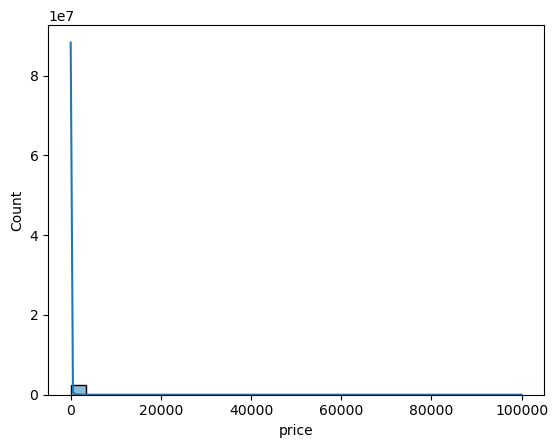

In [16]:
sns.histplot(df["price"], kde=True, bins=30)
# plt.ylim(0,50)
# plt.xticks(rotation=90)

(0.0, 100.0)

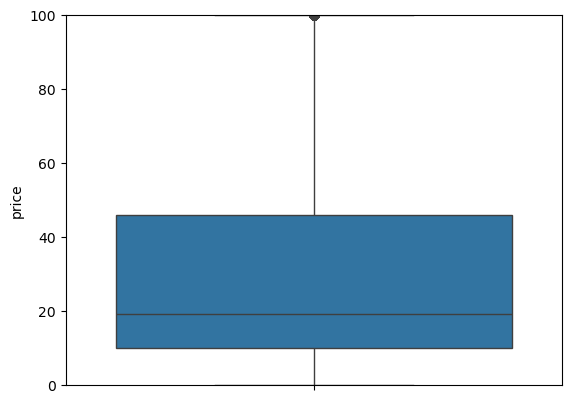

In [17]:
sns.boxplot(df["price"])
plt.ylim(0,100)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [18]:
df["stars"].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [19]:
df["stars"].mode()

0    0.0
Name: stars, dtype: float64

### most of the customers don't rate the products

In [20]:
skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

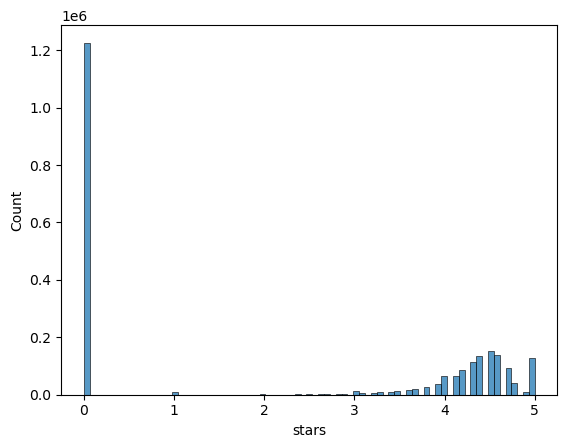

In [21]:
sns.histplot(df["stars"])